<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Goal" data-toc-modified-id="Goal-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Goal</a></span></li><li><span><a href="#Var" data-toc-modified-id="Var-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Var</a></span></li><li><span><a href="#Init" data-toc-modified-id="Init-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Init</a></span></li><li><span><a href="#Load" data-toc-modified-id="Load-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Load</a></span><ul class="toc-item"><li><span><a href="#Project-list" data-toc-modified-id="Project-list-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Project list</a></span></li><li><span><a href="#Summary-of-samples-used" data-toc-modified-id="Summary-of-samples-used-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Summary of samples used</a></span><ul class="toc-item"><li><span><a href="#Writing-table-of-all-samples" data-toc-modified-id="Writing-table-of-all-samples-4.2.1"><span class="toc-item-num">4.2.1&nbsp;&nbsp;</span>Writing table of all samples</a></span></li></ul></li><li><span><a href="#Bins" data-toc-modified-id="Bins-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Bins</a></span></li><li><span><a href="#DAS-tool-MAGs" data-toc-modified-id="DAS-tool-MAGs-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>DAS-tool MAGs</a></span></li><li><span><a href="#dRep-genomes" data-toc-modified-id="dRep-genomes-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>dRep genomes</a></span></li></ul></li><li><span><a href="#Join" data-toc-modified-id="Join-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Join</a></span></li><li><span><a href="#Number-of-genomes" data-toc-modified-id="Number-of-genomes-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Number of genomes</a></span><ul class="toc-item"><li><span><a href="#Totals" data-toc-modified-id="Totals-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Totals</a></span></li><li><span><a href="#Raw-MAGs" data-toc-modified-id="Raw-MAGs-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Raw MAGs</a></span></li><li><span><a href="#DAS-tool" data-toc-modified-id="DAS-tool-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>DAS-tool</a></span></li><li><span><a href="#dRep" data-toc-modified-id="dRep-6.4"><span class="toc-item-num">6.4&nbsp;&nbsp;</span>dRep</a></span></li></ul></li><li><span><a href="#CheckM-stats" data-toc-modified-id="CheckM-stats-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>CheckM stats</a></span></li><li><span><a href="#Taxonomy" data-toc-modified-id="Taxonomy-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Taxonomy</a></span><ul class="toc-item"><li><span><a href="#Total" data-toc-modified-id="Total-8.1"><span class="toc-item-num">8.1&nbsp;&nbsp;</span>Total</a></span></li><li><span><a href="#By-project" data-toc-modified-id="By-project-8.2"><span class="toc-item-num">8.2&nbsp;&nbsp;</span>By project</a></span></li></ul></li><li><span><a href="#sessionInfo" data-toc-modified-id="sessionInfo-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>sessionInfo</a></span></li></ul></div>

# Goal

* Summarize all `LLMGA` runs

# Var

In [1]:
work_dir = '/ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects/summary/LLMGA/'
tmp_out_dir = '/ebio/abt3_projects/databases_no-backup/animal_gut_metagenomes/multi-study_MG-asmbl/'

# Init

In [4]:
library(dplyr)
library(tidyr)
library(ggplot2)
library(data.table)
set.seed(8304)

source('/ebio/abt3_projects/Georg_animal_feces/code/misc_r_functions/init.R')

In [3]:
make_dir(work_dir)

Directory already exists: /ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects/summary/LLMGA/ 


# Load

## Project list

In [5]:
projects = dir(tmp_out_dir, 'PR*', full.names = TRUE) %>% sapply(basename) %>% as.vector
projects %>% length %>% print
projects

[1] 13


[1] "PRJEB11755"              "PRJEB20308"             
 [3] "PRJEB22765"              "PRJEB23642"             
 [5] "PRJEB29346"              "PRJEB9357"              
 [7] "PRJNA316560-PRJNA316570" "PRJNA336354"            
 [9] "PRJNA381379"             "PRJNA417359"            
[11] "PRJNA476660"             "PRJNA485217"            
[13] "PRJNA532626"

## Summary of samples used

In [6]:
# load bin files
list_samples = function(projectID, tmp_out_dir){
    F = file.path(tmp_out_dir, projectID, 'LLMGA', 'raw')
    x = list.files(F, pattern='*_R1_fastqc.html', 
                   full.names=TRUE, recursive=TRUE) %>%
        basename() %>%
        gsub('_R1_.+', '', .)
    df = data.frame(projectID = projectID,
                    sample = x)

    return(df)
}

# listing all samples used for all assemblies
all_samples = projects %>% as.list %>% lapply(list_samples, tmp_out_dir=tmp_out_dir) %>%
    do.call(rbind, .)

# summary
all_samples$projectID %>% unique %>% length
all_samples$projectID %>% table
all_samples %>% dfhead

[1] 13

.
             PRJEB11755              PRJEB20308              PRJEB22765 
                    100                     100                      20 
             PRJEB23642              PRJEB29346               PRJEB9357 
                     12                      56                      84 
PRJNA316560-PRJNA316570             PRJNA336354             PRJNA381379 
                      4                      15                       6 
            PRJNA417359             PRJNA476660             PRJNA485217 
                    100                       3                      19 
            PRJNA532626 
                     25 

[1] 544   2


projectID,sample
PRJEB11755,SAMEA3663006
PRJEB11755,SAMEA3663010
PRJEB11755,SAMEA3663013


In [7]:
# table of number of samples used for assembly
all_samples %>%
    group_by(projectID) %>%
    summarize(n = n()) %>%
    ungroup() %>%
    arrange(projectID)

projectID,n
PRJEB11755,100
PRJEB20308,100
PRJEB22765,20
PRJEB23642,12
PRJEB29346,56
PRJEB9357,84
PRJNA316560-PRJNA316570,4
PRJNA336354,15
PRJNA381379,6
PRJNA417359,100


### Writing table of all samples

In [21]:
all_samps_file = file.path(work_dir, 'all_samples_used.tsv')
all_samples %>%
    arrange(projectID) %>%
    write.table(file=all_samps_file, sep='\t', quote=FALSE, row.names=FALSE)
cat('File written:', all_samps_file, '\n')

File written: /ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects/summary/LLMGA//all_samples_used.tsv 


## Bins

In [8]:
# load bin files
bin_genomes = function(projectID, tmp_out_dir){
    asmbl_dir = out_dir = file.path(tmp_out_dir, projectID, 'LLMGA')
    bin_dir = file.path(asmbl_dir, 'bin')
    
    # maxbin2
    bin_files = list.files(bin_dir, '*.fasta$', full.names=TRUE, recursive=TRUE)
    bin = data.frame(binID = gsub('\\.fasta$', '', basename(bin_files)),
                 fasta = bin_files,
                 binner = bin_files %>% dirname %>% basename,
                 sample = bin_files %>% dirname %>% dirname %>% basename)
    
    ## metabat2
    bin_files = list.files(bin_dir, '*.fa$', full.names=TRUE, recursive=TRUE)
    X = data.frame(binID = gsub('\\.fa$', '', basename(bin_files)),
                   fasta = bin_files,
                   binner = bin_files %>% dirname %>% basename,
                   sample = bin_files %>% dirname %>% dirname %>% basename)

    ## combine
    bin = rbind(bin, X)
    bin$projectID = projectID
    X = NULL
    return(bin)
}

# loading all bin files
bin = projects %>% as.list %>% lapply(bin_genomes, tmp_out_dir=tmp_out_dir) %>%
    do.call(rbind, .)
bin %>% dfhead

[1] 61871     5


binID,fasta,binner,sample,projectID
coassemble_contigs.001,/ebio/abt3_projects/databases_no-backup/animal_gut_metagenomes/multi-study_MG-asmbl//PRJEB11755/LLMGA/bin/SAMEA3663006/maxbin2_high_prob/coassemble_contigs.001.fasta,maxbin2_high_prob,SAMEA3663006,PRJEB11755
coassemble_contigs.002,/ebio/abt3_projects/databases_no-backup/animal_gut_metagenomes/multi-study_MG-asmbl//PRJEB11755/LLMGA/bin/SAMEA3663006/maxbin2_high_prob/coassemble_contigs.002.fasta,maxbin2_high_prob,SAMEA3663006,PRJEB11755
coassemble_contigs.003,/ebio/abt3_projects/databases_no-backup/animal_gut_metagenomes/multi-study_MG-asmbl//PRJEB11755/LLMGA/bin/SAMEA3663006/maxbin2_high_prob/coassemble_contigs.003.fasta,maxbin2_high_prob,SAMEA3663006,PRJEB11755


## DAS-tool MAGs

In [9]:
das_tool_genomes = function(projectID, tmp_out_dir){
    asmbl_dir = out_dir = file.path(tmp_out_dir, projectID, 'LLMGA')
    das_tool_dir = file.path(asmbl_dir, 'bin_refine', 'DAS_Tool')
    
    dastool_files = list.files(das_tool_dir, '*.fa$', full.names=TRUE, recursive=TRUE)
    dastool = data.frame(binID = gsub('\\.fa$', '', basename(dastool_files)),
                    fasta = dastool_files)
    dastool$projectID = projectID
    return(dastool)
}

# loading all post das-tool files
dastool = projects %>% as.list %>% lapply(das_tool_genomes, tmp_out_dir=tmp_out_dir) %>%
    do.call(rbind, .)
dastool %>% dfhead

[1] 8488    3


binID,fasta,projectID
SAMEA3663006__maxbin2_high_prob.014.contigs,/ebio/abt3_projects/databases_no-backup/animal_gut_metagenomes/multi-study_MG-asmbl//PRJEB11755/LLMGA/bin_refine/DAS_Tool/bins_DASTool_bins/SAMEA3663006__maxbin2_high_prob.014.contigs.fa,PRJEB11755
SAMEA3663006__maxbin2_low_prob.005.contigs,/ebio/abt3_projects/databases_no-backup/animal_gut_metagenomes/multi-study_MG-asmbl//PRJEB11755/LLMGA/bin_refine/DAS_Tool/bins_DASTool_bins/SAMEA3663006__maxbin2_low_prob.005.contigs.fa,PRJEB11755
SAMEA3663006__metabat2_high_PE.015.contigs,/ebio/abt3_projects/databases_no-backup/animal_gut_metagenomes/multi-study_MG-asmbl//PRJEB11755/LLMGA/bin_refine/DAS_Tool/bins_DASTool_bins/SAMEA3663006__metabat2_high_PE.015.contigs.fa,PRJEB11755


## dRep genomes

In [10]:
drep_genomes = function(projectID, tmp_out_dir){
    asmbl_dir = out_dir = file.path(tmp_out_dir, projectID, 'LLMGA')
    drep_dir = file.path(asmbl_dir, 'drep', 'drep')
    
    P = file.path(drep_dir, 'dereplicated_genomes')
    drep_files = list.files(P, '*.fa$', full.names=TRUE)
    drep = data.frame(binID = gsub('\\.fa$', '', basename(drep_files)),
                      fasta = drep_files)
    
    drep$projectID = projectID
    return(drep)
}

# drep genomes
drep = projects %>% as.list %>% lapply(drep_genomes, tmp_out_dir=tmp_out_dir) %>%
    do.call(rbind, .)
drep %>% dfhead

[1] 6940    3


binID,fasta,projectID
SAMEA3663006__maxbin2_high_prob.014.contigs,/ebio/abt3_projects/databases_no-backup/animal_gut_metagenomes/multi-study_MG-asmbl//PRJEB11755/LLMGA/drep/drep/dereplicated_genomes/SAMEA3663006__maxbin2_high_prob.014.contigs.fa,PRJEB11755
SAMEA3663006__maxbin2_low_prob.005.contigs,/ebio/abt3_projects/databases_no-backup/animal_gut_metagenomes/multi-study_MG-asmbl//PRJEB11755/LLMGA/drep/drep/dereplicated_genomes/SAMEA3663006__maxbin2_low_prob.005.contigs.fa,PRJEB11755
SAMEA3663006__metabat2_high_PE.016.contigs,/ebio/abt3_projects/databases_no-backup/animal_gut_metagenomes/multi-study_MG-asmbl//PRJEB11755/LLMGA/drep/drep/dereplicated_genomes/SAMEA3663006__metabat2_high_PE.016.contigs.fa,PRJEB11755


In [11]:
checkm_info = function(projectID, tmp_out_dir){
    asmbl_dir = out_dir = file.path(tmp_out_dir, projectID, 'LLMGA')
    checkm_markers_file = file.path(asmbl_dir, 'checkm', 'markers_qa_summary.tsv')
    
    markers_sum = read.delim(checkm_markers_file, sep='\t')

    markers_sum$projectID = projectID
    return(markers_sum)
}

# checkm info
markers_sum = projects %>% as.list %>% lapply(checkm_info, tmp_out_dir=tmp_out_dir) %>%
    do.call(rbind, .)
markers_sum %>% dfhead

[1] 8488   30


Bin.Id,Marker.lineage,X..genomes,X..markers,X..marker.sets,Completeness,Contamination,Strain.heterogeneity,Genome.size..bp.,X..ambiguous.bases,⋯,Coding.density,Translation.table,X..predicted.genes,X0,X1,X2,X3,X4,X5.,projectID
SAMEA3663136__maxbin2_low_prob.001.contigs,o__Bacteroidales (UID2716),92,487,270,69.20,1.20,36.36,2021688,0,⋯,90.49,11,2269,134,342,11,0,0,0,PRJEB11755
SAMEA3663136__maxbin2_low_prob.002.contigs,c__Clostridia (UID1118),387,223,124,36.76,0.00,0.00,559857,0,⋯,90.98,11,736,136,87,0,0,0,0,PRJEB11755
SAMEA3663136__maxbin2_low_prob.008.contigs,o__Bacteroidales (UID2617),213,406,265,80.57,0.89,60.00,2026627,0,⋯,89.14,11,2016,64,337,5,0,0,0,PRJEB11755


In [12]:
gtdbtk_info = function(projectID, tmp_out_dir){
    asmbl_dir = out_dir = file.path(tmp_out_dir, projectID, 'LLMGA')
    gtdbtk_bac_sum_file = file.path(asmbl_dir, 'gtdbtk', 'gtdbtk_bac_summary.tsv')
    gtdbtk_arc_sum_file = file.path(asmbl_dir, 'gtdbtk', 'gtdbtk_ar_summary.tsv')

    ## bacteria
    gtdb = read.delim(gtdbtk_bac_sum_file, sep='\t') %>%
        dplyr::select(-other_related_references.genome_id.species_name.radius.ANI.AF.) %>%
        separate(classification, c('Domain', 'Phylum', 'Class', 'Order', 'Family', 'Genus', 'Species'), sep=';')
    ## archaea
    if(file.size(gtdbtk_arc_sum_file) > 0){
        X = read.delim(gtdbtk_arc_sum_file, sep='\t', header=FALSE) 
        colnames(X) = gtdbtk_bac_sum_file %>% read.delim(sep='\t') %>% colnames
        X = X %>%
            dplyr::select(-other_related_references.genome_id.species_name.radius.ANI.AF.) %>%
            separate(classification, c('Domain', 'Phylum', 'Class', 'Order', 'Family', 'Genus', 'Species'), sep=';')
        gtdb = rbind(gtdb,X)
    }
    gtdb$projectID = projectID
    return(gtdb)
}

# gtdb info
gtdb = projects %>% as.list %>% lapply(gtdbtk_info, tmp_out_dir=tmp_out_dir) %>%
    do.call(rbind, .)
gtdb %>% dfhead

Warning message:
“Expected 7 pieces. Missing pieces filled with `NA` in 1 rows [1].”Warning message:
“Expected 7 pieces. Missing pieces filled with `NA` in 1 rows [1].”Warning message in `[<-.factor`(`*tmp*`, ri, value = c(0.912633214467, 0.908236779677, :
“invalid factor level, NA generated”Warning message in `[<-.factor`(`*tmp*`, ri, value = c(0.949860619467, 0.854655634167, :
“invalid factor level, NA generated”

[1] 8490   25


user_genome,Domain,Phylum,Class,Order,Family,Genus,Species,fastani_reference,fastani_reference_radius,⋯,closest_placement_ani,closest_placement_af,pplacer_taxonomy,classification_method,note,aa_percent,translation_table,red_value,warnings,projectID
SAMEA3663177__metabat2_low_PE.009.contigs,d__Bacteria,p__Bacteroidota,c__Bacteroidia,o__Bacteroidales,f__Bacteroidaceae,g__Prevotella,s__Prevotella sp000834015,GCF_000834015.1,95.0,⋯,99.21,0.98,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Bacteroidales;f__Bacteroidaceae;g__Prevotella;s__,ANI/Placement,topological placement and ANI have congruent species assignments,89.25,11,N/A,N/A,PRJEB11755
SAMEA3663136__metabat2_low_PE.004.contigs,d__Bacteria,p__Firmicutes_C,c__Negativicutes,o__Acidaminococcales,f__Acidaminococcaceae,g__Phascolarctobacterium_A,s__Phascolarctobacterium_A succinatutens,GCF_000188175.1,95.0,⋯,99.52,1.0,d__Bacteria;p__Firmicutes_C;c__Negativicutes;o__Acidaminococcales;f__Acidaminococcaceae;g__Phascolarctobacterium_A;s__,ANI/Placement,topological placement and ANI have congruent species assignments,63.73,11,N/A,N/A,PRJEB11755
SAMEA3663177__metabat2_high_PE.004.contigs,d__Bacteria,p__Firmicutes_C,c__Negativicutes,o__Veillonellales,f__Dialisteraceae,g__Dialister,s__Dialister sp000434475,GCA_000434475.1,95.0,⋯,96.55,0.96,d__Bacteria;p__Firmicutes_C;c__Negativicutes;o__Veillonellales;f__Dialisteraceae;g__Dialister;s__,ANI/Placement,topological placement and ANI have congruent species assignments,53.21,11,N/A,N/A,PRJEB11755


# Join

In [13]:
# drep & checkm
drep_j = drep %>%
    inner_join(markers_sum, c('binID'='Bin.Id', 'projectID'='projectID')) 
drep_j %>% dfhead

Warning message:
“Column `binID`/`Bin.Id` joining factors with different levels, coercing to character vector”

[1] 6940   31


binID,fasta,projectID,Marker.lineage,X..genomes,X..markers,X..marker.sets,Completeness,Contamination,Strain.heterogeneity,⋯,GC.std..scaffolds...1kbp.,Coding.density,Translation.table,X..predicted.genes,X0,X1,X2,X3,X4,X5.
SAMEA3663006__maxbin2_high_prob.014.contigs,/ebio/abt3_projects/databases_no-backup/animal_gut_metagenomes/multi-study_MG-asmbl//PRJEB11755/LLMGA/drep/drep/dereplicated_genomes/SAMEA3663006__maxbin2_high_prob.014.contigs.fa,PRJEB11755,g__Prevotella (UID2721),65,530,280,59.43,4.85,23.68,⋯,4.73,88.59,11,2555,223,273,32,2,0,0
SAMEA3663006__maxbin2_low_prob.005.contigs,/ebio/abt3_projects/databases_no-backup/animal_gut_metagenomes/multi-study_MG-asmbl//PRJEB11755/LLMGA/drep/drep/dereplicated_genomes/SAMEA3663006__maxbin2_low_prob.005.contigs.fa,PRJEB11755,o__Bacteroidales (UID2716),92,487,270,94.03,0.93,0.00,⋯,2.97,89.41,11,2094,21,463,3,0,0,0
SAMEA3663006__metabat2_high_PE.016.contigs,/ebio/abt3_projects/databases_no-backup/animal_gut_metagenomes/multi-study_MG-asmbl//PRJEB11755/LLMGA/drep/drep/dereplicated_genomes/SAMEA3663006__metabat2_high_PE.016.contigs.fa,PRJEB11755,c__Epsilonproteobacteria (UID3065),111,445,271,62.24,1.47,85.71,⋯,2.56,90.15,11,1090,149,289,7,0,0,0


In [14]:
# drep & gtdbtk
drep_j = drep_j %>%
    left_join(gtdb, c('binID'='user_genome', 'projectID'='projectID'))
drep_j %>% dfhead

Warning message:
“Column `binID`/`user_genome` joining character vector and factor, coercing into character vector”

[1] 6940   54


binID,fasta,projectID,Marker.lineage,X..genomes,X..markers,X..marker.sets,Completeness,Contamination,Strain.heterogeneity,⋯,closest_placement_taxonomy,closest_placement_ani,closest_placement_af,pplacer_taxonomy,classification_method,note,aa_percent,translation_table,red_value,warnings
SAMEA3663006__maxbin2_high_prob.014.contigs,/ebio/abt3_projects/databases_no-backup/animal_gut_metagenomes/multi-study_MG-asmbl//PRJEB11755/LLMGA/drep/drep/dereplicated_genomes/SAMEA3663006__maxbin2_high_prob.014.contigs.fa,PRJEB11755,g__Prevotella (UID2721),65,530,280,59.43,4.85,23.68,⋯,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Bacteroidales;f__Bacteroidaceae;g__Prevotella;s__Prevotella sp900313215,98.04,0.51,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Bacteroidales;f__Bacteroidaceae;g__Prevotella;s__,Placement,taxonomic classification fully defined by topology,53.67,11,0.998888797112,N/A
SAMEA3663006__maxbin2_low_prob.005.contigs,/ebio/abt3_projects/databases_no-backup/animal_gut_metagenomes/multi-study_MG-asmbl//PRJEB11755/LLMGA/drep/drep/dereplicated_genomes/SAMEA3663006__maxbin2_low_prob.005.contigs.fa,PRJEB11755,o__Bacteroidales (UID2716),92,487,270,94.03,0.93,0.00,⋯,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Bacteroidales;f__Bacteroidaceae;g__Prevotella;s__Prevotella sp002251295,99.14,0.98,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Bacteroidales;f__Bacteroidaceae;g__Prevotella;s__,ANI/Placement,topological placement and ANI have congruent species assignments,90,11,N/A,N/A
SAMEA3663006__metabat2_high_PE.016.contigs,/ebio/abt3_projects/databases_no-backup/animal_gut_metagenomes/multi-study_MG-asmbl//PRJEB11755/LLMGA/drep/drep/dereplicated_genomes/SAMEA3663006__metabat2_high_PE.016.contigs.fa,PRJEB11755,c__Epsilonproteobacteria (UID3065),111,445,271,62.24,1.47,85.71,⋯,N/A,N/A,N/A,d__Bacteria;p__Campylobacterota;c__Campylobacteria;o__Campylobacterales;f__Campylobacteraceae;g__Campylobacter;s__,Placement,taxonomic classification fully defined by topology,57.78,11,0.927874269506,N/A


# Number of genomes

## Totals

In [15]:
cat('Number of binned genomes:', bin$fasta %>% unique %>% length)

Number of binned genomes: 61871

In [16]:
cat('Number of DAS-Tool passed genomes:', dastool$binID %>% unique %>% length)

Number of DAS-Tool passed genomes: 8488

In [17]:
cat('Number of 99% ANI de-rep genomes:', drep_j$binID %>% unique %>% length)

Number of 99% ANI de-rep genomes: 6940

## Raw MAGs

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  18.00   76.75  373.00 1189.83 2628.25 3985.00 


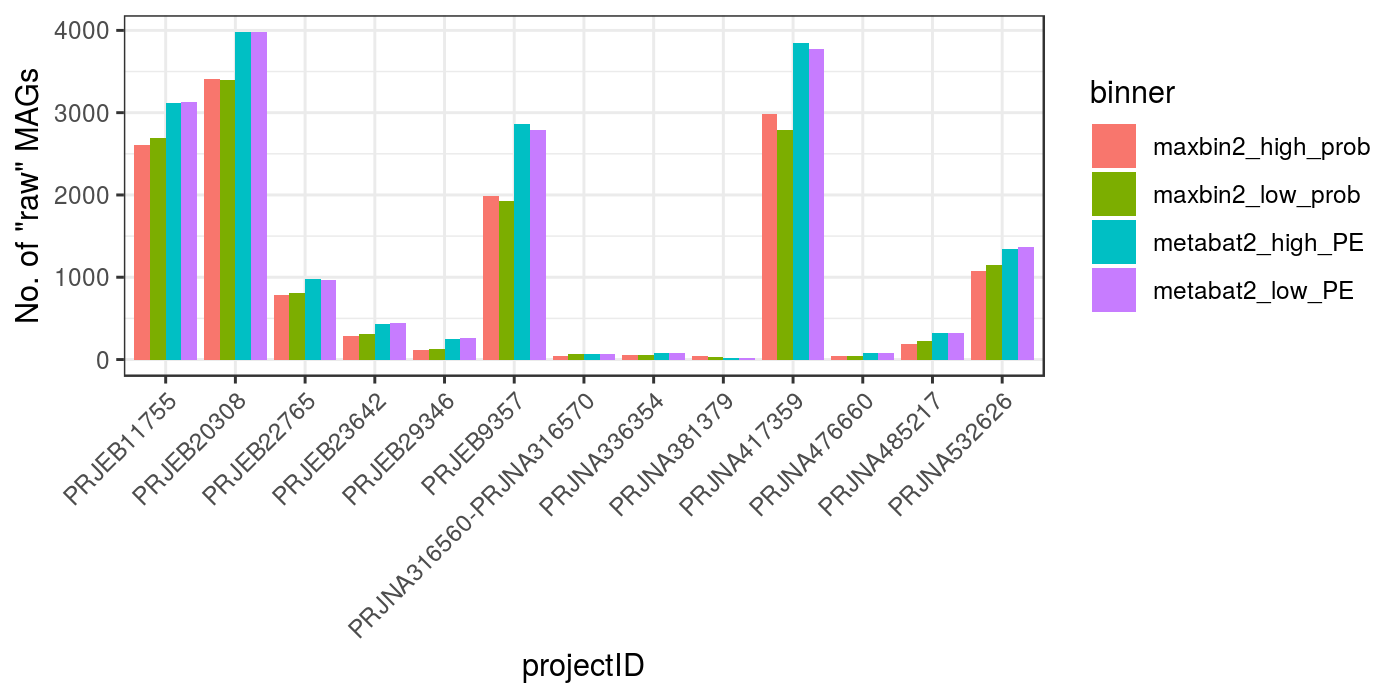

In [19]:
# number of 'raw' MAGs
bin_s = bin %>%
    group_by(projectID, binner) %>%
    summarize(n_bins = n()) %>%
    ungroup 

bin_s$n_bins %>% summary %>% print

p = bin_s %>%
    ggplot(aes(projectID, n_bins, fill=binner)) +
    geom_bar(stat='identity', position='dodge') +
    labs(y='No. of "raw" MAGs') +
    theme_bw() +
    theme(
        axis.text.x = element_text(angle=45, hjust=1)
    )

dims(7,3.5)
plot(p)

## DAS-tool

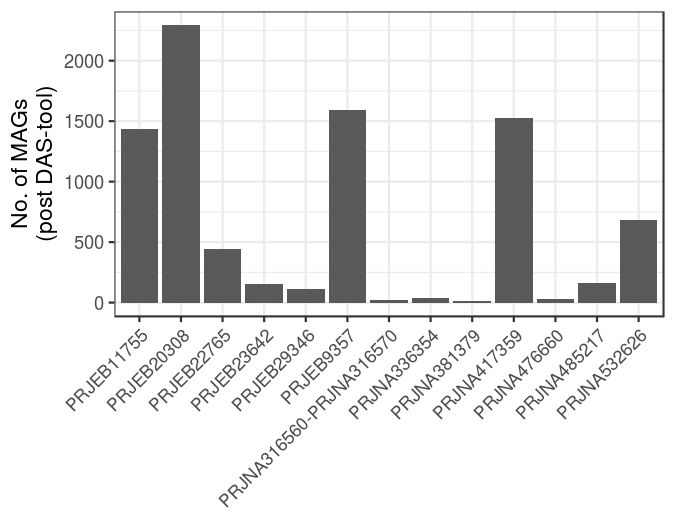

In [23]:
# number of genomes
p = dastool %>%
    ggplot(aes(projectID)) +
    geom_bar() +
    labs(y='No. of MAGs\n(post DAS-tool)') +
    theme_bw() +
    theme(
        axis.title.x = element_blank(),
        axis.text.x = element_text(angle=45, hjust=1)
    )

dims(4.5,3.5,res=150)
plot(p)

.
maxbin2_high_prob  maxbin2_low_prob  metabat2_high_PE   metabat2_low_PE 
               13                13                13                13 


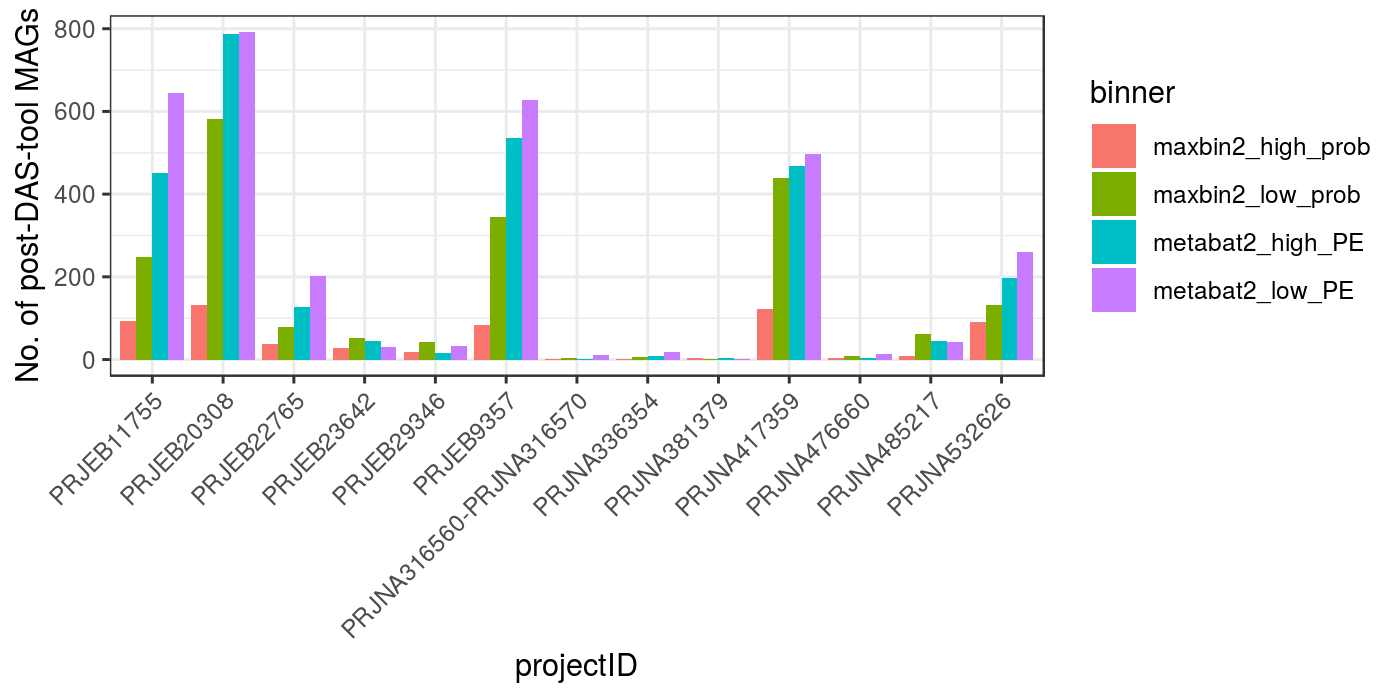

In [21]:
dastool_s = dastool %>%
    mutate(binner = gsub('.+__', '', binID),
           binner = gsub('\\.[0-9]+\\.contigs$', '', binner)) %>%
    group_by(projectID, binner) %>%
    summarize(n_bins = n()) %>%
    ungroup() 

dastool_s$binner %>% table %>% print

p = dastool_s %>%
    ggplot(aes(projectID, n_bins, fill=binner)) +
    geom_bar(stat='identity', position='dodge') +
    labs(y='No. of post-DAS-tool MAGs') +
    theme_bw() +
    theme(
        axis.text.x = element_text(angle=45, hjust=1)
    )

dims(7,3.5)
plot(p)

## dRep

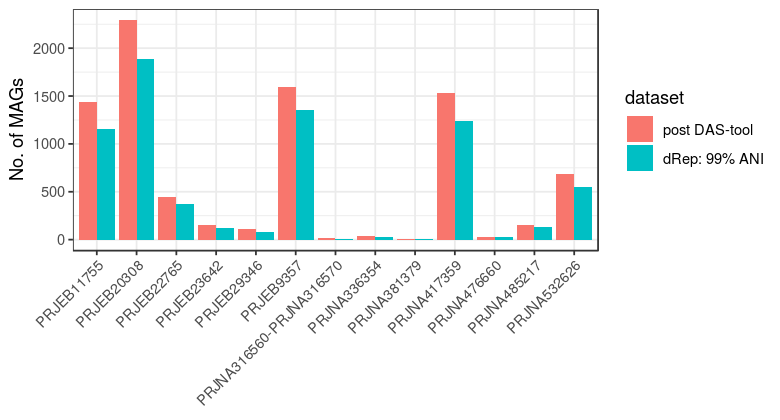

In [73]:
X = dastool %>% 
    group_by(projectID) %>%
    summarize(n = n()) %>%
    ungroup() %>%
    mutate(dataset = 'post DAS-tool')

Y = drep_j %>% 
    group_by(projectID) %>%
    summarize(n = n()) %>%
    ungroup() %>%
    mutate(dataset = 'dRep: 99% ANI')

p = rbind(X, Y) %>%
    mutate(dataset = dataset %>% factor(levels=c('post DAS-tool', 'dRep: 99% ANI'))) %>%
    ggplot(aes(projectID, n, fill=dataset)) +
    geom_bar(stat='identity', position='dodge') +
    labs(y='No. of MAGs') +
    theme_bw() +
    theme(
        axis.title.x = element_blank(),
        axis.text.x = element_text(angle=45, hjust=1)
    )

dims(6.5,3.5)
plot(p)

# CheckM stats

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  50.08   78.61   91.39   86.24   96.63  100.00 
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   0.500   1.080   1.295   1.900   5.000 


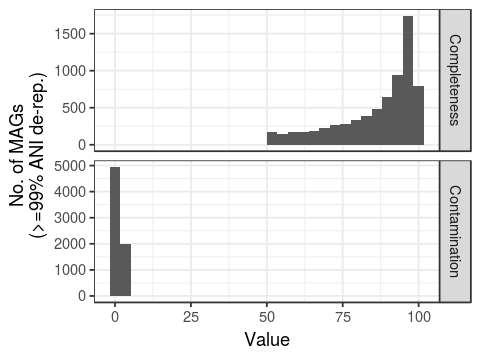

In [74]:
# checkm stats
drep_j$Completeness %>% summary %>% print
drep_j$Contamination %>% summary %>% print

p = drep_j %>%
    dplyr::select( binID, Completeness, Contamination) %>%
    gather(Metric, Value, -binID) %>%
    ggplot(aes(Value)) +
    geom_histogram(bins=30) +
    labs(y='No. of MAGs\n(>=99% ANI de-rep.)') +
    facet_grid(Metric ~ ., scales='free_y') +
    theme_bw() 

dims(4,3)
plot(p)

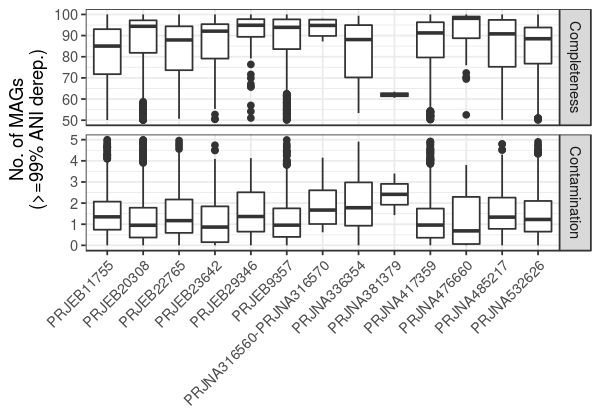

In [75]:
# checkm stats
p = drep_j %>%
    dplyr::select(projectID, binID, Completeness, Contamination) %>%
    gather(Metric, Value, -projectID, -binID) %>%
    ggplot(aes(projectID, Value)) +
    geom_boxplot() +
    labs(y='No. of MAGs\n(>=99% ANI derep.)') +
    facet_grid(Metric ~ ., scales='free_y') +
    theme_bw() +
    theme(
        axis.title.x = element_blank(),
        axis.text.x = element_text(angle=45, hjust=1)
    )

dims(5,3.5)
plot(p)

# Taxonomy

## Total

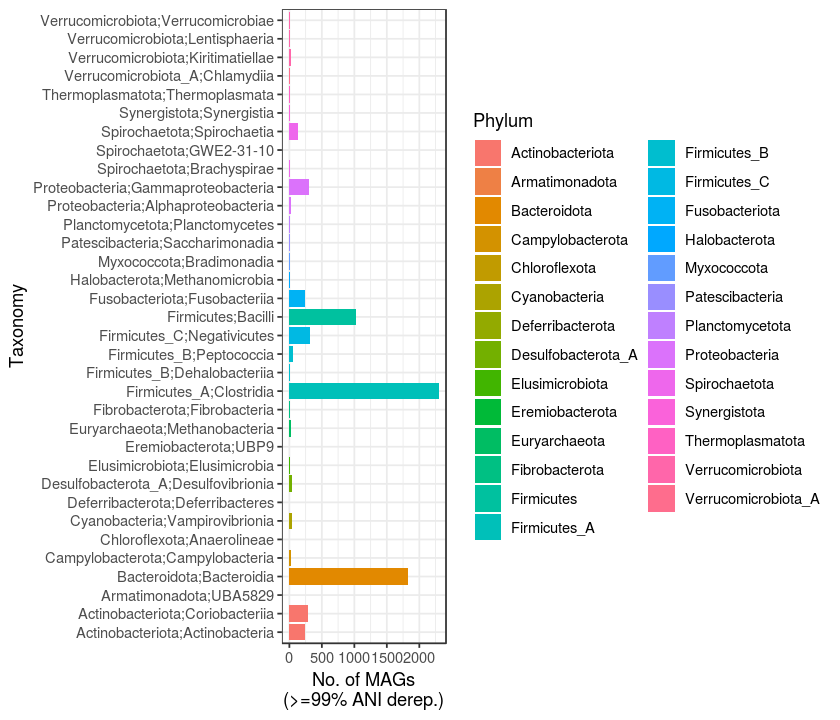

In [77]:
# Total by class
p = drep_j %>%
    mutate(Phylum = gsub('^p__', '', Phylum),
           Class = gsub('^c__', '', Class)) %>%
    unite(Taxonomy, Phylum, Class, sep=';', remove=FALSE) %>%
    group_by(Taxonomy, Phylum) %>%
    summarize(n = n()) %>%
    ungroup() %>%
    ggplot(aes(Taxonomy, n, fill=Phylum)) +
    geom_bar(stat='identity') +
    coord_flip() +
    labs(y='No. of MAGs\n(>=99% ANI derep.)') +
    theme_bw() 

dims(7,6)
plot(p)

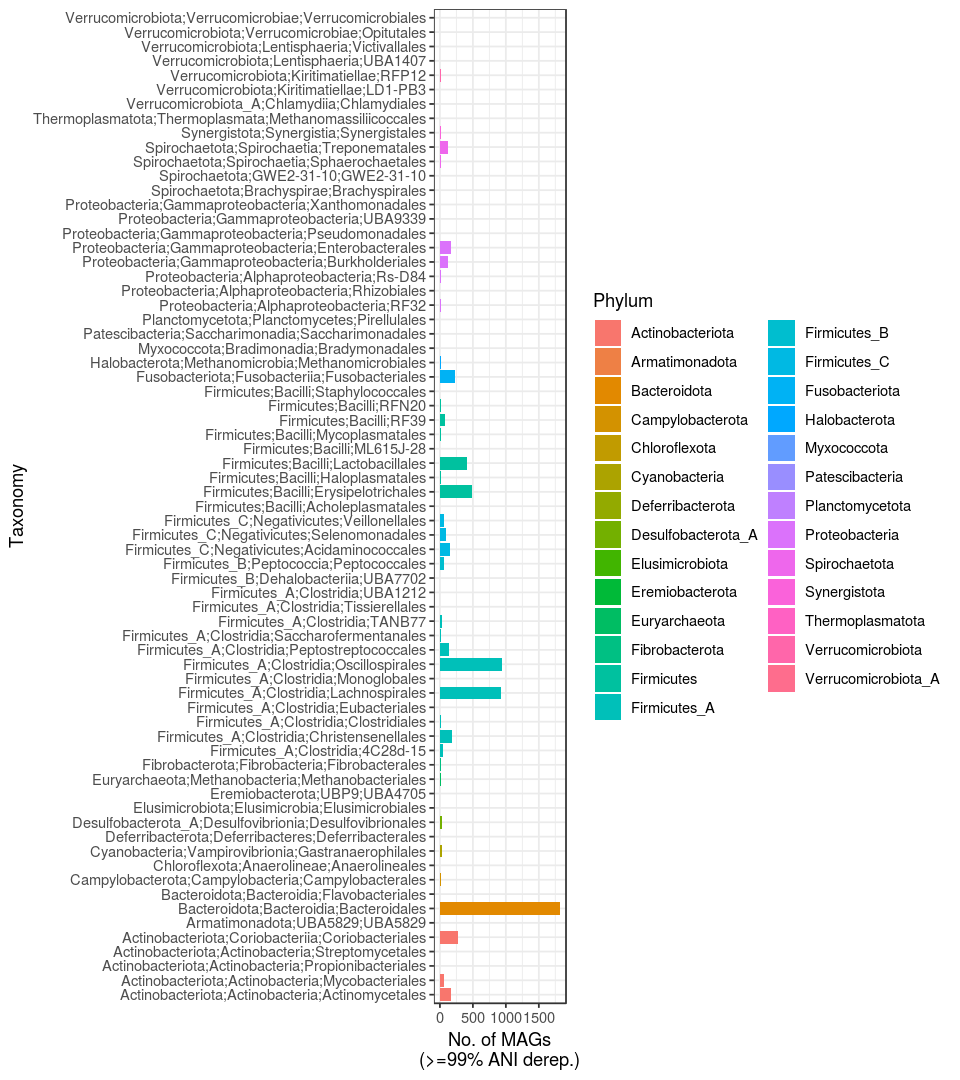

In [78]:
# Total by order
p = drep_j %>%
    mutate(Phylum = gsub('^p__', '', Phylum),
           Class = gsub('^c__', '', Class),
           Order = gsub('^o__', '', Order)) %>%
    unite(Taxonomy, Phylum, Class, Order, sep=';', remove=FALSE) %>%
    group_by(Taxonomy, Phylum) %>%
    summarize(n = n()) %>%
    ungroup() %>%
    ggplot(aes(Taxonomy, n, fill=Phylum)) +
    geom_bar(stat='identity') +
    coord_flip() +
    labs(y='No. of MAGs\n(>=99% ANI derep.)') +
    theme_bw() 

dims(8,9)
plot(p)

In [91]:
# Christ. genomes
drep_j %>%
    filter(Order == 'o__Christensenellales') %>%
    nrow %>% print
# Methanogen genomes
drep_j %>%
    filter(Domain == 'd__Archaea',
           grepl('^c__Methano', Class)) %>%
    nrow %>% print

[1] 188
[1] 29


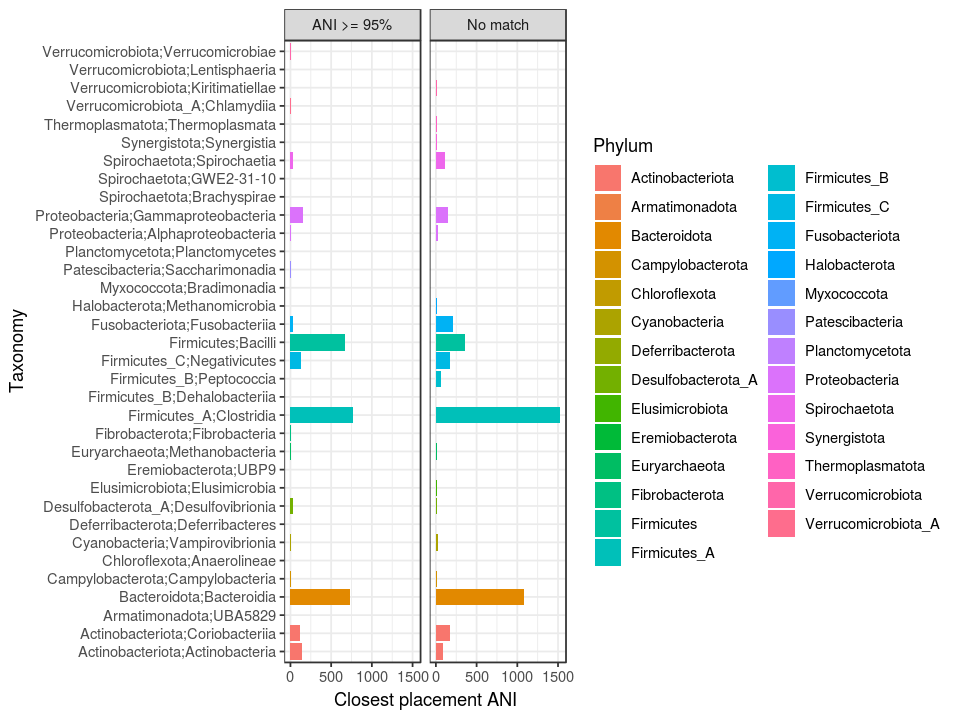

In [79]:
# no close ANI matches 
p = drep_j %>%
    mutate(Phylum = gsub('^p__', '', Phylum),
           Class = gsub('^c__', '', Class),
           Order = gsub('^o__', '', Order)) %>%
    unite(Taxonomy, Phylum, Class, sep=';', remove=FALSE) %>%
    mutate(closest_placement_ani = closest_placement_ani %>% as.character,
           closest_placement_ani = ifelse(closest_placement_ani == 'N/A', 
                                          0, closest_placement_ani),
           closest_placement_ani = ifelse(is.na(closest_placement_ani), 
                                          0, closest_placement_ani),
           closest_placement_ani = closest_placement_ani %>% as.Num) %>%
    mutate(has_species_placement = ifelse(closest_placement_ani >= 95,
                                          'ANI >= 95%', 'No match')) %>%
    ggplot(aes(Taxonomy, fill=Phylum)) +
    geom_bar() +
    facet_grid(. ~ has_species_placement) +
    coord_flip() +
    labs(y='Closest placement ANI') +
    theme_bw() 

dims(8,6)
plot(p)

Number of genomes lacking a genus-level classification: 627 


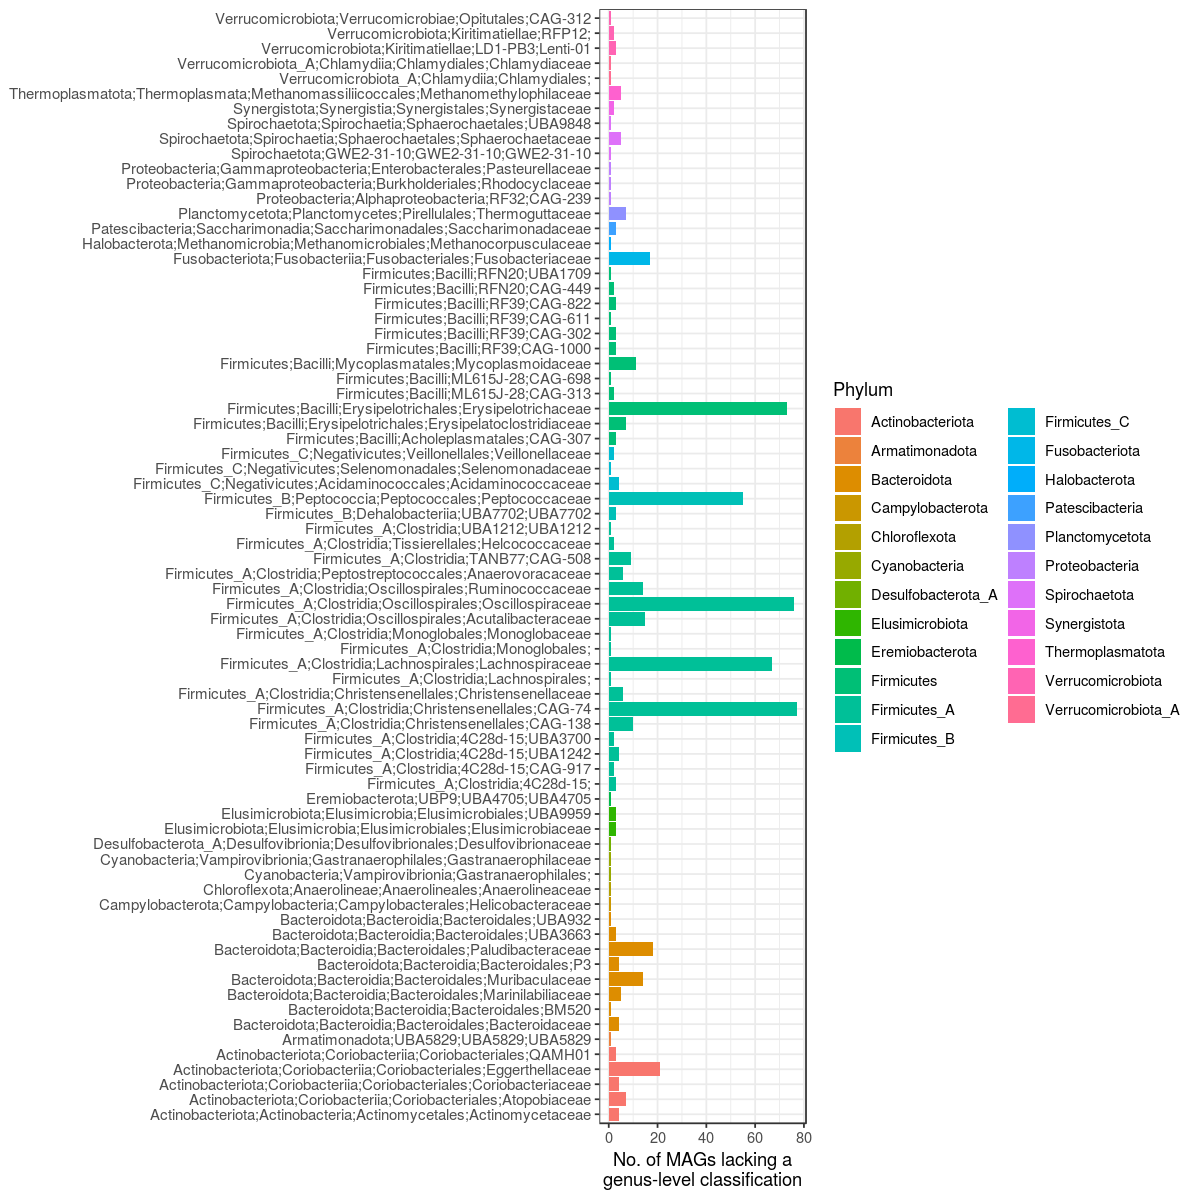

In [95]:
drep_j_s = drep_j %>%
    filter(Genus == 'g__') %>%
    mutate(Phylum = gsub('^p__', '', Phylum),
           Class = gsub('^c__', '', Class),
           Order = gsub('^o__', '', Order),
           Family = gsub('^f__', '', Family)) %>%
    unite(Taxonomy, Phylum, Class, Order, Family, sep=';', remove=FALSE) %>%
    group_by(Taxonomy, Phylum) %>%
    summarize(n = n()) %>%
    ungroup()

cat('Number of genomes lacking a genus-level classification:',
    drep_j_s$n %>% sum, '\n')

p = drep_j_s %>%
    ggplot(aes(Taxonomy, n, fill=Phylum)) +
    geom_bar(stat='identity') +
    coord_flip() +
    labs(y='No. of MAGs lacking a\ngenus-level classification') +
    theme_bw() +
    theme(
        axis.text.y = element_text(size=9),
        axis.title.y = element_blank()
    )

dims(10,10)
plot(p)

Number of genomes lacking a family-level classification: 9 


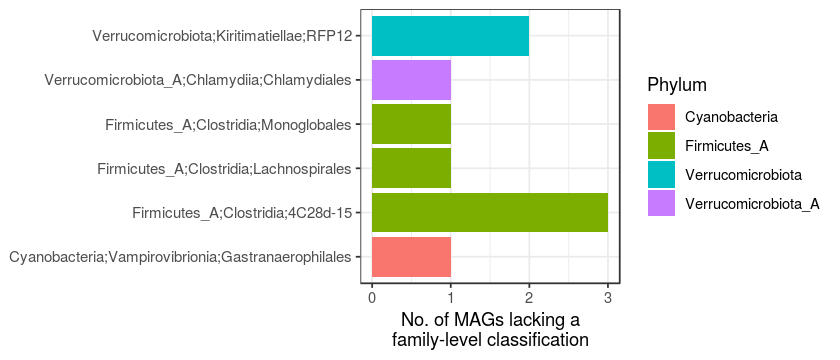

In [99]:
drep_j_s = drep_j %>%
    filter(Family == 'f__') %>%
    mutate(Phylum = gsub('^p__', '', Phylum),
           Class = gsub('^c__', '', Class),
           Order = gsub('^o__', '', Order),
           Family = gsub('^f__', '', Family)) %>%
    unite(Taxonomy, Phylum, Class, Order, Family, sep=';', remove=FALSE) %>%
    mutate(Taxonomy = gsub(';$', '', Taxonomy)) %>%
    group_by(Taxonomy, Phylum) %>%
    summarize(n = n()) %>%
    ungroup()

cat('Number of genomes lacking a family-level classification:',
    drep_j_s$n %>% sum, '\n')

p = drep_j_s %>%
    ggplot(aes(Taxonomy, n, fill=Phylum)) +
    geom_bar(stat='identity') +
    coord_flip() +
    labs(y='No. of MAGs lacking a\nfamily-level classification') +
    theme_bw() +
    theme(
        axis.text.y = element_text(size=9),
        axis.title.y = element_blank()
    )

dims(7,3)
plot(p)

## By project

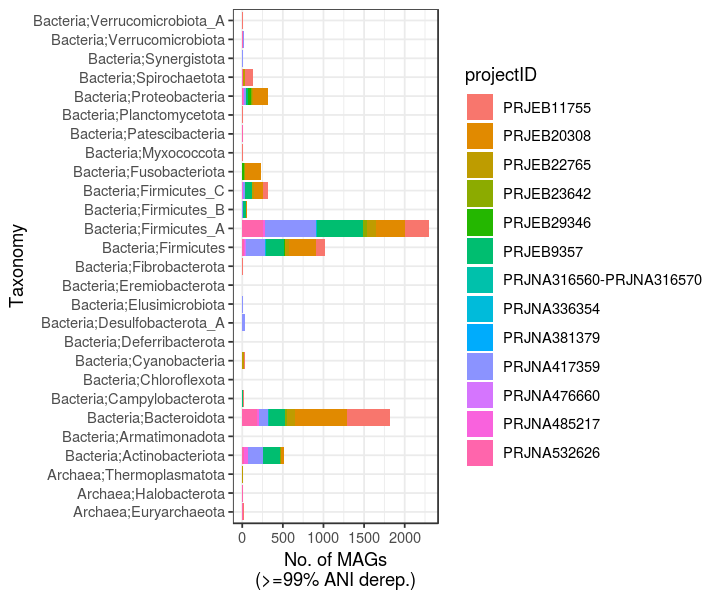

In [81]:
# Total by phylum
p = drep_j %>%
    mutate(Domain = gsub('^d__', '', Domain),
           Phylum = gsub('^p__', '', Phylum)) %>%
    unite(Taxonomy, Domain, Phylum, sep=';', remove=FALSE) %>%
    group_by(projectID, Taxonomy, Domain) %>%
    summarize(n = n()) %>%
    ungroup() %>%
    ggplot(aes(Taxonomy, n, fill=projectID)) +
    geom_bar(stat='identity') +
    coord_flip() +
    labs(y='No. of MAGs\n(>=99% ANI derep.)') +
    theme_bw() 

dims(6,5)
plot(p)

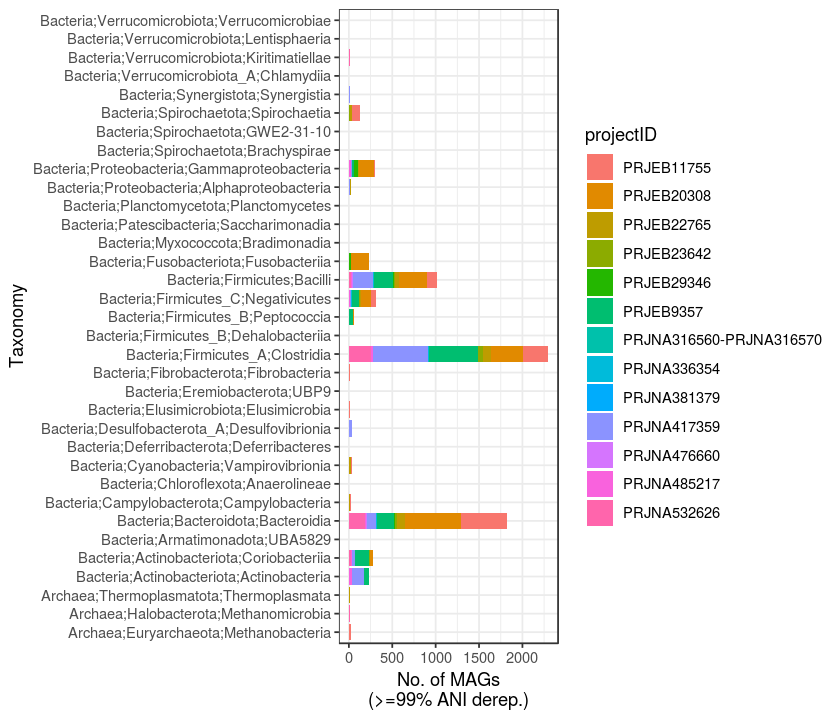

In [84]:
# Total by class
p = drep_j %>%
    mutate(Domain = gsub('^d__', '', Domain),
           Phylum = gsub('^p__', '', Phylum),
           Class =  gsub('^c__', '', Class)) %>%
    unite(Taxonomy, Domain, Phylum, Class, sep=';', remove=FALSE) %>%
    group_by(projectID, Taxonomy) %>%
    summarize(n = n()) %>%
    ungroup() %>%
    ggplot(aes(Taxonomy, n, fill=projectID)) +
    geom_bar(stat='identity') +
    coord_flip() +
    labs(y='No. of MAGs\n(>=99% ANI derep.)') +
    theme_bw() 

dims(7,6)
plot(p)

# sessionInfo

In [83]:
sessionInfo()

R version 3.4.1 (2017-06-30)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Ubuntu 18.04.3 LTS

Matrix products: default
BLAS: /ebio/abt3_projects/software/miniconda3_gt4.4/envs/py3_physeq/lib/R/lib/libRblas.so
LAPACK: /ebio/abt3_projects/software/miniconda3_gt4.4/envs/py3_physeq/lib/R/lib/libRlapack.so

locale:
[1] en_US.UTF-8

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] bindrcpp_0.2.2    data.table_1.11.4 ggplot2_3.0.0     tidyr_0.8.1      
[5] dplyr_0.7.6      

loaded via a namespace (and not attached):
 [1] Rcpp_0.12.17     pillar_1.2.2     compiler_3.4.1   plyr_1.8.4      
 [5] bindr_0.1.1      base64enc_0.1-3  tools_3.4.1      digest_0.6.15   
 [9] uuid_0.1-2       jsonlite_1.5     evaluate_0.10.1  tibble_1.4.2    
[13] gtable_0.2.0     pkgconfig_2.0.1  rlang_0.2.1      IRdisplay_0.4.4 
[17] IRkernel_0.8.12  repr_0.15.0      withr_2.1.1      stringr_1.3.1   
[21] grid_3.4.1       tidyselec